In [19]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Function to remove outliers using IQR
def remove_outliers(data):
    cleaned_data = np.copy(data)
    for i in range(data.shape[1]):
        feature_data = data[:, i]
        q1 = np.percentile(feature_data, 25)
        q3 = np.percentile(feature_data, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        cleaned_data[:, i] = np.where(
            (feature_data < lower_bound) | (feature_data > upper_bound),
            np.nan,  # Use NaN to indicate outliers
            feature_data,
        )
    return cleaned_data

In [10]:
t = torch.load("/mnt/BigHD_1/loucas/data/2a27d6b6-4797-44df-b097-5acc11ffcc4d.pt")
t.shape

torch.Size([300, 4096, 35])

In [15]:
data = t[:, 0]
data.shape

torch.Size([300, 35])

In [16]:
data = data.cpu().numpy()

In [21]:
data = data[10:, 0:8]
data = remove_outliers(data)

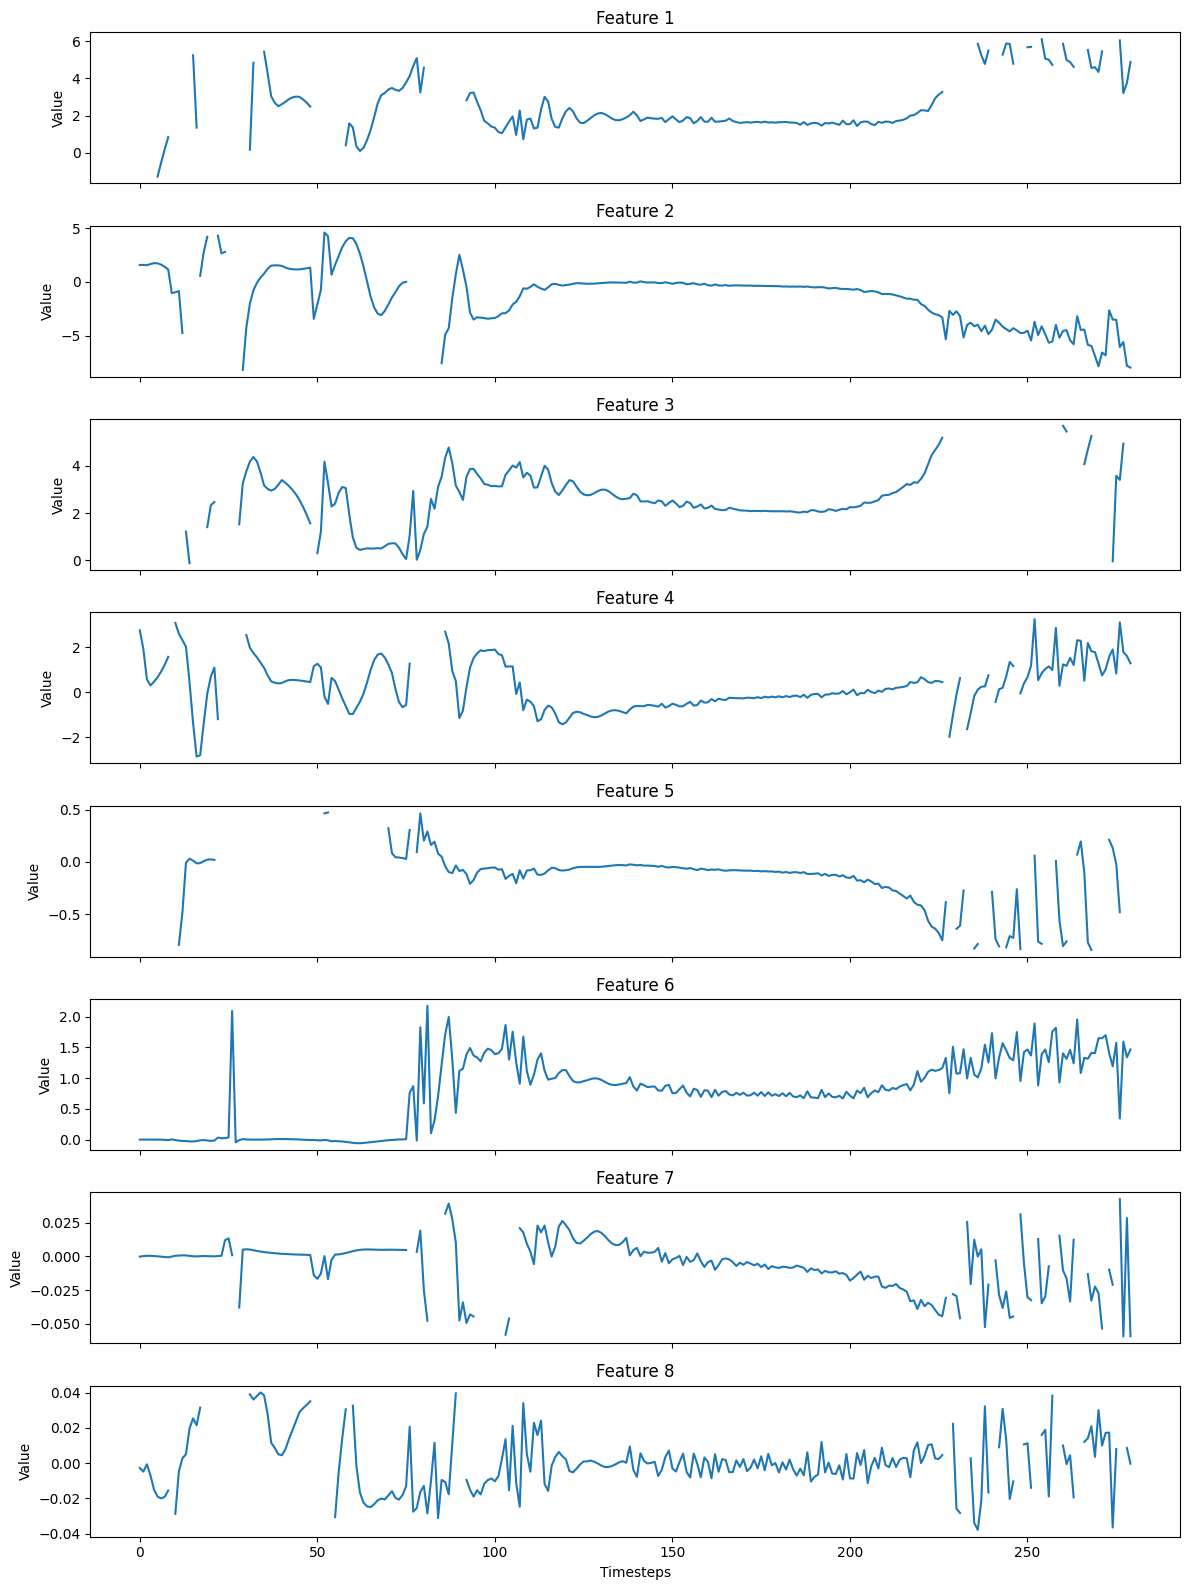

In [22]:
# Number of features
num_features = data.shape[1]

# Create subplots
fig, axes = plt.subplots(num_features, 1, figsize=(12, 2 * num_features), sharex=True)

# Plot each feature in a separate subplot
for i in range(num_features):
    axes[i].plot(data[:, i])
    axes[i].set_title(f"Feature {i + 1}")
    axes[i].set_ylabel("Value")

axes[-1].set_xlabel("Timesteps")
plt.tight_layout()
plt.show()